In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# names for training and testing data
train_files = ['resnet18_train.csv', 'resnet34_train.csv', 'resnet50_train.csv', 'resnet50_withmixup_train.csv']
test_files = ['resnet18_test.csv', 'resnet34_test.csv', 'resnet50_test.csv', 'resnet50_withmixup_test.csv']
model_names = ['ResNet18', 'ResNet34', 'ResNet50', 'ResNet50 with Mixup']

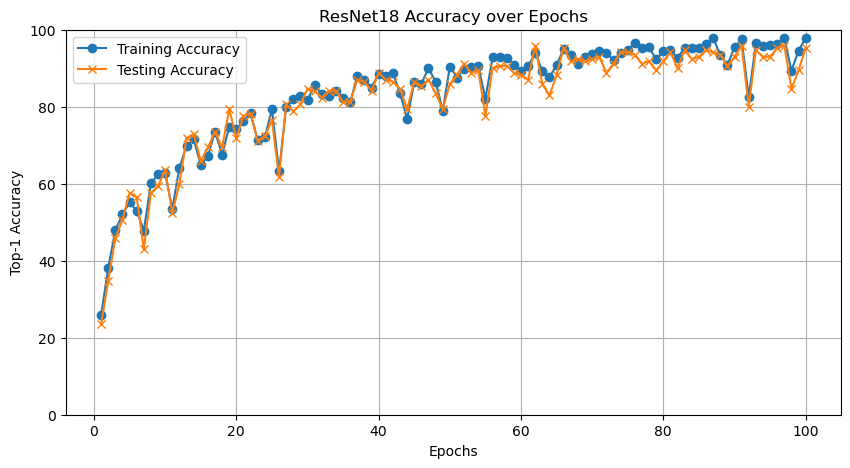

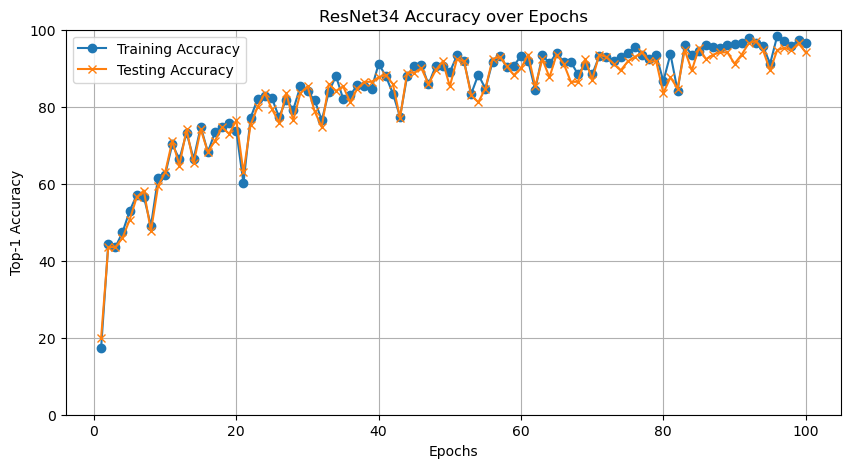

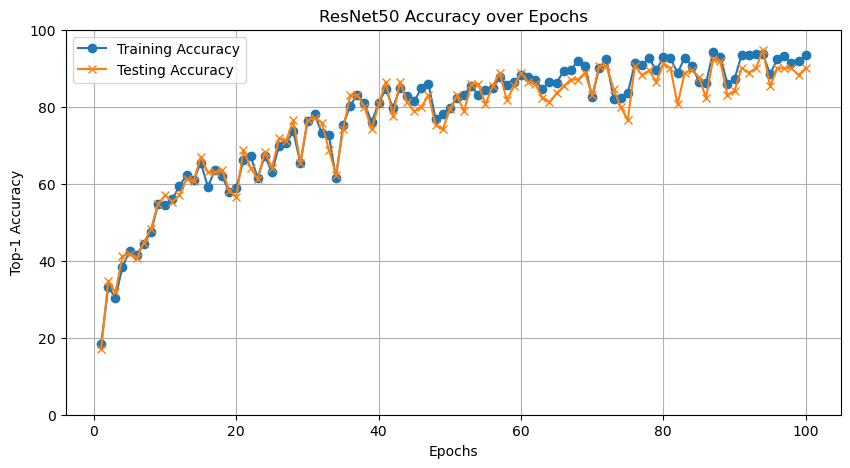

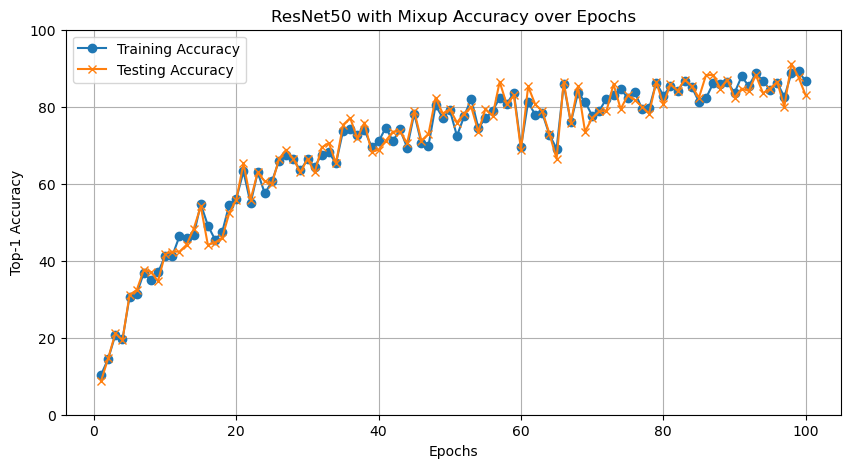

In [3]:
# Initialize lists to store the highest accuracies
highest_train_accuracies = []
highest_test_accuracies = []

# Plot accuracy over epochs for each model
for train_file, test_file, model_name in zip(train_files, test_files, model_names):
    # Read training and testing data
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)
    
    # Plot training accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_df['Epoch'], train_df['Top-1 Accuracy'], label='Training Accuracy', marker='o')
    
    # Plot testing accuracy
    plt.plot(test_df['Epoch'], test_df['Top-1 Accuracy'], label='Testing Accuracy', marker='x')
    
    # Add titles and labels
    plt.title(f'{model_name} Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Top-1 Accuracy')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 100)
    plt.show()

    # Store the highest accuracy
    highest_train_accuracies.append(train_df['Top-1 Accuracy'].max())
    highest_test_accuracies.append(test_df['Top-1 Accuracy'].max())


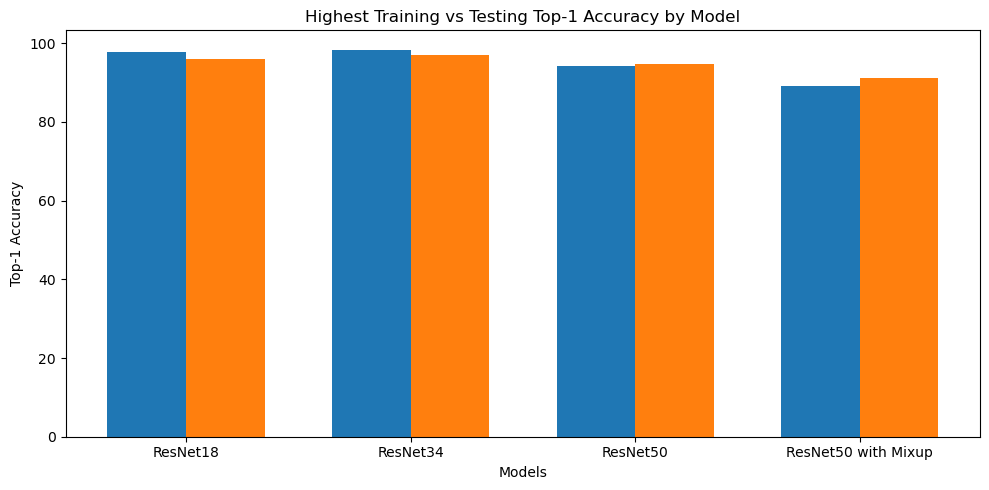

In [5]:
x = range(len(model_names))
bar_width = 0.35

# bar chart for highest accuracies
plt.figure(figsize=(10, 5))
plt.bar(x, highest_train_accuracies, bar_width, label='Highest Training Accuracy')
plt.bar([p + bar_width for p in x], highest_test_accuracies, bar_width, label='Highest Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Top-1 Accuracy')
plt.title('Highest Training vs Testing Top-1 Accuracy by Model')
plt.xticks([p + bar_width / 2 for p in x], model_names)
# plt.legend()
plt.tight_layout()
plt.show()

In [26]:
# names for testing data
test_files = ['vgg11_test.csv', 'vgg13_test.csv', 'vgg16_test.csv', 'vgg19_test.csv']
model_names = ['VGG11', 'VGG13', 'VGG16', 'VGG19']
markers = ['o', 'x', '*', '.']

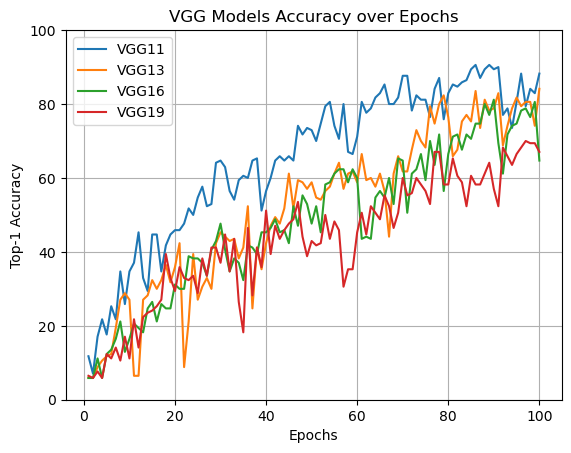

In [30]:
# Initialize lists to store the highest accuracies
highest_test_accuracies = []

# Plot accuracy over epochs for each model
for test_file, model_name, marker in zip(test_files, model_names, markers):
    # Read training and testing data
    test_df = pd.read_csv(test_file)

    # Plot testing accuracy
    plt.plot(test_df['Epoch'], test_df['Top-1 Accuracy'], label=model_name)
    
    # Store the highest accuracy
    highest_test_accuracies.append(test_df['Top-1 Accuracy'].max())

# Add titles and labels
plt.title('VGG Models Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Top-1 Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0, 100)
plt.show()


In [31]:
highest_test_accuracies

[90.58824, 84.11765, 81.17647, 70.0]

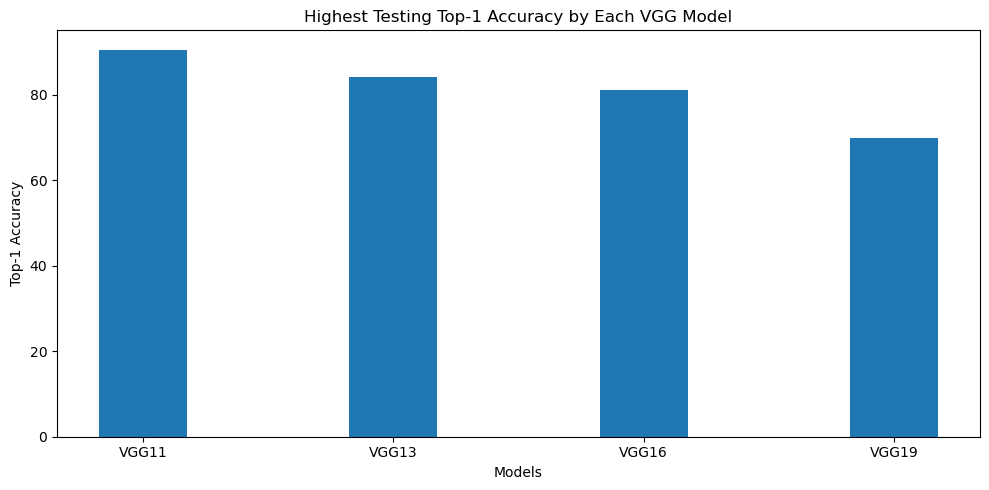

In [44]:
x = range(len(model_names))
bar_width = 0.35

# bar chart for highest accuracies
plt.figure(figsize=(10, 5))
plt.bar([p + bar_width for p in x], highest_test_accuracies, bar_width, label='Highest Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Top-1 Accuracy')
plt.title('Highest Testing Top-1 Accuracy by Each VGG Model')
plt.xticks([p + bar_width for p in x], model_names)
# plt.legend()
plt.tight_layout()
plt.show()